# K Nearest neighbors_CustCat dataset

In this study, I analyze the data of a telecommunications company, including features such as age, region, marital status, and income, to personalize service recommendations for customers. For this purpose, I utilize the K-Nearest Neighbors (KNN) algorithm, which is an effective method for data classification.

The target variable, custcat, consists of four customer groups:
- Basic Service
- E-Service
- Plus Service
- Total Service

The primary objective is to develop a classification model that can accurately predict the class of new cases. By examining the nearest data points, this model identifies customer behavior patterns and facilitates intelligent decision-making for service optimization.

In [1]:
# import required packages
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


This dataset contains **1,000 rows**, each representing a unique customer. Every row includes precise demographic and economic attributes, enabling a comprehensive analysis of customer segmentation and behavior. By leveraging this data, valuable insights into customer preferences can be obtained, facilitating the development of predictive models to enhance personalized service recommendations.


In [2]:
#calling dataset
df=pd.read_csv(r'D:\projects\classification\knn\telecust\telecust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.isnull().any()

region     False
tenure     False
age        False
marital    False
address    False
income     False
ed         False
employ     False
retire     False
gender     False
reside     False
custcat    False
dtype: bool

In [4]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
Y=df['custcat'].values
print(X[:5])
print(Y[:5])

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  
0       2  
1       6  
2       2  
3       1  
4       4  
[1 4 3 1 3]


In [7]:
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
X[:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(200, 11)
(800, 11)
(200,)
(800,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
k=4
model=KNeighborsClassifier(n_neighbors=k)
neighbors=model.fit(X_train,Y_train)
neighbors

KNeighborsClassifier(n_neighbors=4)

In [11]:
yhat=neighbors.predict(X_test)
print(yhat[:5])
print(Y_test[:5])

[1 1 3 2 4]
[4 1 1 2 4]


<Figure size 640x480 with 0 Axes>

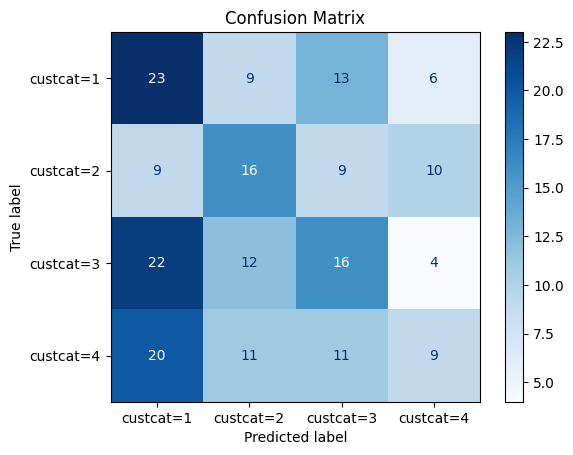

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmat=confusion_matrix(Y_test,yhat,labels=[1,2,3,4])

plt.figure()
plotmat=ConfusionMatrixDisplay(cmat,display_labels=['custcat=1','custcat=2','custcat=3','custcat=4'])
plotmat.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

In [13]:
from sklearn.metrics import classification_report

print (classification_report(Y_test, yhat))


              precision    recall  f1-score   support

           1       0.31      0.45      0.37        51
           2       0.33      0.36      0.35        44
           3       0.33      0.30      0.31        54
           4       0.31      0.18      0.23        51

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.32      0.32      0.31       200



1. **Precision:**
Precision indicates how many of the instances predicted as a specific class truly belong to that class. The precision values for all classes range from 0.31 to 0.33, showing that the model doesn't have a good performance in correctly identifying class-specific instances.

2. **Recall:**
Recall measures how many of the actual instances of a class are correctly identified. The recall values for different classes range from 0.18 to 0.45. Notably, class 4 has a low recall (0.18), indicating the model struggles to identify instances of this class correctly.

3. **F1-score:**
The F1-score is the harmonic mean of precision and recall, balancing both metrics. The F1-score ranges between 0.23 and 0.37, which suggests the model faces challenges in class predictions overall.

4. **Overall Accuracy:**
The model’s overall accuracy is 0.32, meaning only 32% of instances were classified correctly. This relatively low accuracy suggests that the model needs improvement.

In [24]:
from sklearn.metrics import f1_score
k=1
f1=0
while f1<0.8:
    mod=KNeighborsClassifier(n_neighbors=k)
    neig=mod.fit(X_train,Y_train)
    Yhat=neig.predict(X_test)
   
    f1 = f1_score(Y_test, Yhat, average='macro')
    
    print(f"k = {k}, F1-score = {f1:.2f}")
    
    k += 1
    if k > 50:  
        print("It stops to prevent unlimited execution!")
        break



k = 1, F1-score = 0.30
k = 2, F1-score = 0.25
k = 3, F1-score = 0.30
k = 4, F1-score = 0.31
k = 5, F1-score = 0.31
k = 6, F1-score = 0.30
k = 7, F1-score = 0.33
k = 8, F1-score = 0.32
k = 9, F1-score = 0.33
k = 10, F1-score = 0.32
k = 11, F1-score = 0.30
k = 12, F1-score = 0.33
k = 13, F1-score = 0.32
k = 14, F1-score = 0.30
k = 15, F1-score = 0.33
k = 16, F1-score = 0.35
k = 17, F1-score = 0.35
k = 18, F1-score = 0.35
k = 19, F1-score = 0.34
k = 20, F1-score = 0.33
k = 21, F1-score = 0.34
k = 22, F1-score = 0.36
k = 23, F1-score = 0.37
k = 24, F1-score = 0.36
k = 25, F1-score = 0.36
k = 26, F1-score = 0.36
k = 27, F1-score = 0.34
k = 28, F1-score = 0.36
k = 29, F1-score = 0.37
k = 30, F1-score = 0.38
k = 31, F1-score = 0.39
k = 32, F1-score = 0.39
k = 33, F1-score = 0.37
k = 34, F1-score = 0.36
k = 35, F1-score = 0.35
k = 36, F1-score = 0.38
k = 37, F1-score = 0.38
k = 38, F1-score = 0.40
k = 39, F1-score = 0.39
k = 40, F1-score = 0.39
k = 41, F1-score = 0.39
k = 42, F1-score = 0.37
k

**Analysis of Results:**

 1. ***F1-score shows little change with increasing k:*** The F1-score remains between 0.25 and 0.40. Increasing k up to 50 did not significantly improve the model’s performance.

 2. ***Peaks and declines in model accuracy:*** Initially, F1-score improves as k increases (from 0.30 to 0.40). However, after k = 38, the model stabilizes, and further changes are minimal.

 3. ***Poor model performance:*** The F1-score remains far below 0.8, indicating that the model struggles to classify data effectively. Even with increasing k, no significant improvement is observed.